<a href="https://colab.research.google.com/github/Lavanda-da/ml/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled20_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных

In [ ]:
import pandas as pd
import random

In [ ]:
medium_articles_path = 'medium_articles.csv'

data = pd.read_csv(medium_articles_path, encoding='utf-8', on_bad_lines="skip", engine="python")

In [ ]:
data.head()

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [ ]:
data = data.dropna()

Разделим выборку на тестирующую и валидационную

In [ ]:
valid_len = int(data.shape[0] * 0.3)
train_len = data.shape[0] - valid_len

In [ ]:
val_ind = random.sample(range(data.shape[0]), valid_len)

In [ ]:
train = [data.iloc[i]['text'] for i in range(len(data)) if i not in val_ind]
valid = [data.iloc[i]['text'] for i in range(len(data)) if i in val_ind]

Сохраним полученные данные в два файла соответственно: в train.txt и valid.txt

In [ ]:
with open("train.txt", "w") as file:
    file.write("\n".join(train))

In [ ]:
with open("valid.txt", "w") as file:
    file.write("\n".join(valid))

# Предобученная модель

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

In [ ]:
model_name_or_path = "sberbank-ai/rugpt3large_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name_or_path)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/622 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.14G [00:00<?, ?B/s]

Посмотрим, как текущая модель справляется с заданием

In [ ]:
# prompt engineering
text = "Today we are talking about"
input_ids = tokenizer.encode(text, return_tensors="pt")
out = model.generate(input_ids, do_sample=True, min_length=100, max_length=500)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


Today we are talking about some of the very famous comics and the best they have become, and the first thing to do is make them a part of our conversation. So, we have a couple of issues, one with you.

First a guest’s guess on what you'd like them to do and the other one where we’re going to make them into a compact. What kind of guess you'd like them to do, and what kind of editor they might decide to do.

Diarma: What's the format of DC'stuff?

Editor: It's something we’ve talked about in our conversation, we’ve started a process:

We’re working with a couple of small, but very exciting entrant groups. One is a very powerful team that was working together in a few years and was working on a series there for over two years; it was called Flashback. In that thread, they worked together as a team, like being in one space, looked at what they could do and had some discussions and then they just did a project together. That was Flashback.

Diarma: Even though it has been two years, the 

In [ ]:
out = model.generate(input_ids, do_sample=False, min_length=100, max_length=500)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


Today we are talking about the first time we have seen a new type of molecular cloud. The first cloud type is a cloud of molecules, which is a very different type of cloud than the one we have seen in the past. The first cloud type is a cloud of molecules, which is a very different type of cloud than the one we have seen in the past.

The first cloud type is a cloud of molecules, which is a very different type of cloud than the one we have seen in the past.

The first cloud type is a cloud of molecules, which is a very different type of cloud than the one we have seen in the past.

The first cloud type is a cloud of molecules, which is a very different type of cloud than the one we have seen in the past.

The first cloud type is a cloud of molecules, which is a very different type of cloud than the one we have seen in the past.

The first cloud type is a cloud of molecules, which is a very different type of cloud than the one we have seen in the past.

The first cloud type is a cloud 

Первый раз модель генерировала текст с параметром do_sample=True, который означал, что сводующего слово в генерации выбирается случайно из некоторой выборки наиболее вероятных слов. В общем, текст имеет некоторую смысловую и логическую связность, в общем, понятно, что статья написано в виде интервью о саздании какого-то фильма.

Второй раз модель генерировала текст с параметром do_sample=False, что означала, что следующее слово выбиралось, как самое вероятное и наиболее вероятностно подходящее. Это привело к зацикливанию и бесконечной генерации одного и того же предложения.

# Finetuning

До-обучим нашу модель и посмотрим, как изменится генерация текста

In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling

In [ ]:
train_path = 'train.txt'
valid_path = 'valid.txt'

train_dataset = TextDataset(tokenizer=tokenizer, file_path=train_path, block_size=64)
valid_dataset = TextDataset(tokenizer=tokenizer, file_path=valid_path, block_size=64)

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

/usr/local/lib/python3.11/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./finetuned",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=10,
    gradient_accumulation_steps=16,
    )

model = model.to("cpu")

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    optimizers = (torch.optim.AdamW(model.parameters(),lr=1e-5), None)
)

In [ ]:
trainer.train()

В ноутбуке на обучение не хватило оперативной памяти (использование gpu не помогло, так как слишком маленькая квота)

Поэтому я обучала в PyCharm. Ниже приведены результаты обучения

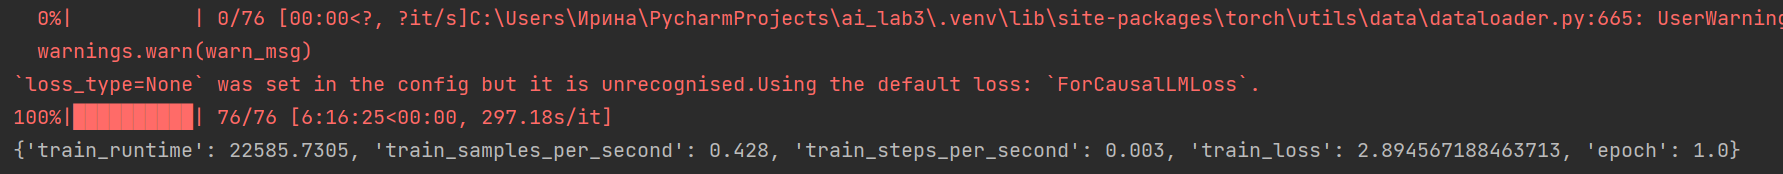

Я дообучала всего 1 эпоху, это и так было долго без использования gpu.

Давайте посмотрим на текст, который выдала дообученная модель

Today we are talking about the concepts to develop a framework for the production of COVID-19 and other viruses. These viruses have a range of targets for disease control and it is highly effective to target one of those targets more than others. And, when this target is defined the output should be as simple as the productivity of the virus, and so on
Let’s start with the basics for how we can use and build the framework for the production of COVID-19.

We can use a COVID-19 Framework in this article if you need to.

Constructing a framework to test an individual case.

For this article a framework for building the COVID-19 COVID-19 COVID-19 case is available.

The basic COVID-19 cases

First we need to define the cases where we will test new viruses and viruses that are vulnerable to SARS-CoV-2, COVID-19, etc.

However, we also need to define those viruses into case types, which are defined by the virus identifier. This identifier is the number of viruses (infections) that we have to test, but it should also be the number of virus types of the specific virus.

We need to define which virus type we will use and the virus identifier from which we will execute the COVID-19 case. The virus identifier is the identifier of the virus that we will be testing.

Second we need to define the new virus type by virus identifier in the COVID-19 case. With this identifier we can be more confident with the COVID-19 case being a single virus/genotype.

Third, we need a way (the identifier) to compute the virus identifier between the viruses we test and the type of the identified virus.

This will be the virus identifier for each virus vectors.

The identification of virus type determines the virus type in the case.

Iterating virus types as functions and implementing the COVID-19 COVID-19 case.

An example of how this works in this paper.

A virus type is a virus type. It is defined in the SARS-CoV-2 virus identifier.

The following is a simple example of how can we define the virus identifier in a COVID-19 case.

I.I.Normality

The COVID-19 COVID-19 case is defined by the virus identifier. The virus identifier is the identumber of the virus identifier.

To measure the virus type we can use a “search tree”.

Let us start with the example of using search tree to compute the identifier to the virus type.

It is important to note how the SARS-CoV-2-Idders/subtype virus identifier is defined by the virus identifier. This classifies a virus type.

Let us use search tree, in our case, to determine the virus type from the SARS-CoV-2 virus identifier.

Step 1

We first define the component type. Equipping the component type gives me two identifiers: id and identifier.

The component type is a vector of COVID-19 and will not be part of the COVID-19 case

The component type of classify virus types, it should be an object, so that is not part of the COVID-19 COVID-19 case

The virus type fetches an id of virifactor, which can be called by the component type as virifactor.

Moreover, the component type can be a multiple of virifactor: tid, that includes both id and identifier as well, that are called as component types.

Next we need to define the components type by component types.

The component type is a vector of virifactor.

The component type is defined using component types.

We define the virifactor fetching two identifiers: virifactor and name from the component type. We are going to define the component type by component in step two, as above.

The component type is defined in component in the component set with the virifactor and name.

The virifactor has the information provided by the component type.

Virifactor vector is defined in the cascade and then it can be used for component fetching fetching virifactors.

Behind the scenes of code development

This COVID-19 COVID-19 COVID-19 case consists of two virus types (virifactor and name).

There is a virus type where we have to make the identifier of virifactor as a number, so our virifactor type is given by the component component type.

Virifactors are a type of types and it is available via component types.

The virifactor type gives one virifactor for each virus from the SARS-CoV-2 virus identifier.

The virifactor type takes a virifactor type and defines the virifactor vectors of the viruses we can test. This is easily done with component type and virifactor vector in step three.

Selecting a viri fetching method in a virifactor vector

Selecting a viri fetching method in a virifactor vector can be done through a virifactor object virifactor. The following works with the virfactor instance in a viri object.

Using fetch vorifactor

The following method uses the fetch vorifactor

This function takes the virifactor vorifactor and defines it as a set of type,

var that can be used for making the identifier and name of the virus.

Setting the identifier for the virifactor is done in the structure of fetchvr.prototype as fetchvr.prototype.

Type component can be taken by the component as type of the virifactor.

Selecting the type virtual type from the component virtual_type

Selecting the type from the virtual_type is done in a virtual_value structure.

For both of these inputs we can use an instance.

To make the type and viri fetch vorifactor from fetchvr we need to select the variables in the first query for the type.

As we can see from this example the variables are as follows.

variables_cp = vbx1.varv = vbx2.varv = vbx3.varv = vbx4.varv = vbx5.varv = vbx6.varv = vbx7.varv = vbx8.varv = vbx9.varv = vbx10.varv = vbx11.varv = vbx12.varv = vbx13.varv = vbx14.varv = _vi0.varv, _vi1.varv, _vi2.varv, _vi3.varv, _vi4.varv;

A variable name is assigned to a virifactor type. As each of our variables will be a name for v

# Заключение

Можно заметить, что после дообучения статья стала более высокого стиля, более научной, с более сложными словами, терминами.

Думаю, после увеличения количества эпох статья стала бы чуть более приближена к реальности.

И промт в будущем тоже стоит задавать более конкретным.